In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("ar-601_fingers_parameters_Khusnutdinov.txt", comment='#', header=None);
df = df.multiply(0.01);

In [56]:
thumbd = df.loc[0:6]
indexd = df.loc[7:13]
middled = df.loc[14:19]
ringd = df.loc[20:26]
pinkyd = df.loc[27:]

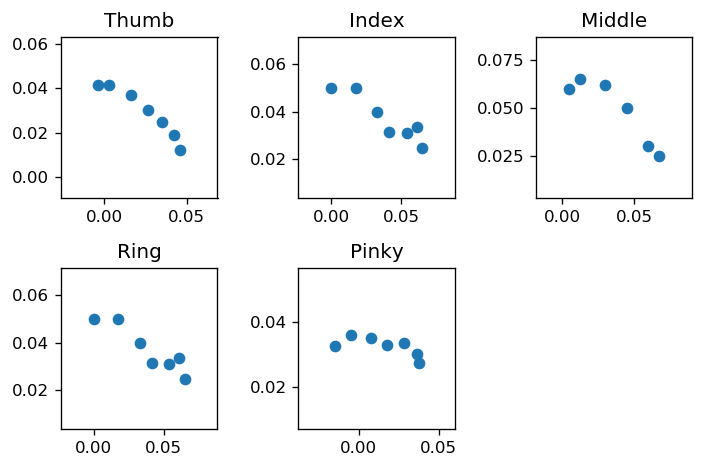

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=3, dpi=120)
axs = axs.flatten()
axs[0].set_title('Thumb')
axs[0].scatter(thumbd[0], thumbd[1])
axs[1].set_title('Index')
axs[1].scatter(indexd[0], indexd[1])
axs[2].set_title('Middle')
axs[2].scatter(middled[0], middled[1])
axs[3].set_title('Ring')
axs[3].scatter(ringd[0], ringd[1])
axs[4].set_title('Pinky')
axs[4].scatter(pinkyd[0], pinkyd[1])

axs[5].set_visible(False)

#for x in axs:
#    x.set_xlim(-2, 10)
#    x.set_ylim(-2, 10)  
fig.tight_layout()
plt.axis('equal')
plt.show()

In [5]:
import sympy as sy
import numpy as np

In [39]:
angle, x1, x2, y1, y2, k1, k2, offset1, offset2, l1, l2, l3 = sy.symbols('angle x1 y1 x2 y2 k1 k2 offset1 offset2 l1 l2 l3')
mimic1 = k1*angle + offset1
x1 = l1*sy.sin(angle) + l2*sy.sin(mimic1)
y1 = l1*sy.cos(angle) + l2*sy.cos(mimic1)
mimic2 = k2*mimic1 + offset2
x2 = x1 + l3*sy.sin(mimic2)
y2 = y1 + l3*sy.cos(mimic2)

In [46]:
f_1_joint_x = sy.lambdify([angle, k1, offset1, l1, l2], x1)
f_1_joint_y = sy.lambdify([angle, k1, offset1, l1, l2], y1)
f_2_joint_x = sy.lambdify([angle, k1, k2, offset1, offset2, l1, l2, l3], x2)
f_2_joint_y = sy.lambdify([angle, k1, k2, offset1, offset2, l1, l2, l3], y2)

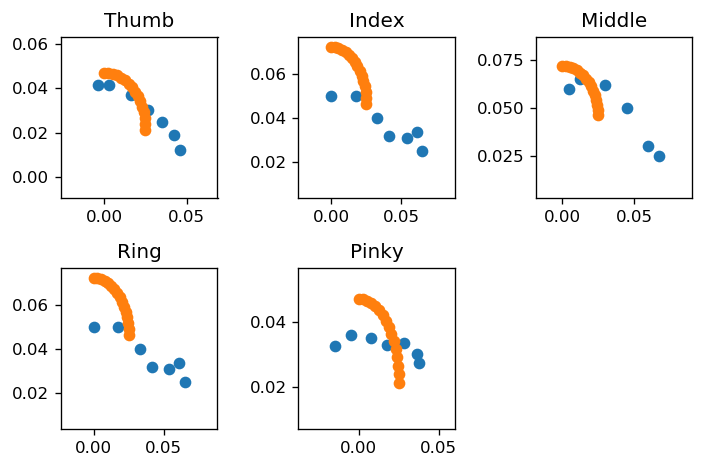

In [66]:
j1_l1 = 0.025
j1_l2 = 0.022
j2_l1 = 0.025
j2_l2 = 0.025
j2_l3 = 0.022 
j1_offset = 0
j1_k = 0
j2_offset1 = 0
j2_offset2 = 0
j2_k1 = 0
j2_k2 = 0
tj1x =[ f_1_joint_x(a, j1_k, j1_offset, j1_l1, j1_l2) for a in np.linspace(0,1.6,16) ]
tj1y =[ f_1_joint_y(a, j1_k, j1_offset, j1_l1, j1_l2) for a in np.linspace(0,1.6,16) ]
tj2x =[ f_2_joint_x(a, j2_k1, j2_k2, j2_offset1, j2_offset2, j2_l1, j2_l2, j2_l3) for a in np.linspace(0,1.6,16) ]
tj2y =[ f_2_joint_y(a, j2_k1, j2_k2, j2_offset1, j2_offset2, j2_l1, j2_l2, j2_l3) for a in np.linspace(0,1.6,16) ]


fig, axs = plt.subplots(nrows=2, ncols=3, dpi=120)
axs = axs.flatten()
axs[0].set_title('Thumb')
axs[0].scatter(thumbd[0], thumbd[1])
axs[0].scatter(tj1x, tj1y)
axs[1].set_title('Index')
axs[1].scatter(indexd[0], indexd[1])
axs[1].scatter(tj2x, tj2y)
axs[2].set_title('Middle')
axs[2].scatter(middled[0], middled[1])
axs[2].scatter(tj2x, tj2y)
axs[3].set_title('Ring')
axs[3].scatter(ringd[0], ringd[1])
axs[3].scatter(tj2x, tj2y)
axs[4].set_title('Pinky')
axs[4].scatter(pinkyd[0], pinkyd[1])
axs[4].scatter(tj1x, tj1y)

axs[5].set_visible(False)

#for x in axs:
#    x.set_xlim(-2, 10)
#    x.set_ylim(-2, 10)  
fig.tight_layout()
plt.axis('equal')
plt.show()